# Linear Regression

This is a project running multiple linear regression algorithm that will form a prediction of y axis using several variables as x axis.
Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Every value of the independent variable x is associated with a value of the dependent variable y. 

In [3]:
using DataFrames, CSV
using Plots
pyplot();

## Data
Loading the csv data, we are using car_data.csv that can be obtained from https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [4]:
data = CSV.read("car_data.csv");
first(data,6)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type
,String,Int64,Float64,Float64,Int64,String,String
1,ritz,2014,3.35,5.59,27000,Petrol,Dealer
2,sx4,2013,4.75,9.54,43000,Diesel,Dealer
3,ciaz,2017,7.25,9.85,6900,Petrol,Dealer
4,wagon r,2011,2.85,4.15,5200,Petrol,Dealer
5,swift,2014,4.6,6.87,42450,Diesel,Dealer
6,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer


## Splitting Dataset
The data we already obtained needs to be splitted into training set and test set which can be described as:
training set—a subset to train a model.
test set—a subset to test the trained model.

In [5]:
using LinearAlgebra, Statistics
n = size(data, 1)
data_train = data[1:(Int(floor(n * 0.8))), :]
data_test = data[(Int(floor(n * 0.8)))+1 : n, :]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type
,String,Int64,Float64,Float64,Int64,String,String
1,verna,2012,5.35,9.4,32322,Diesel,Dealer
2,xcent,2015,4.75,7.13,35866,Petrol,Dealer
3,xcent,2014,4.4,7.13,34000,Petrol,Dealer
4,i20,2016,6.25,7.6,7000,Petrol,Dealer
5,verna,2013,5.95,9.4,49000,Diesel,Dealer
6,verna,2012,5.2,9.4,71000,Diesel,Dealer
7,i20,2012,3.75,6.79,35000,Petrol,Dealer
8,verna,2015,5.95,9.4,36000,Petrol,Dealer
9,i10,2013,4.0,4.6,30000,Petrol,Dealer


## Regression
In this part we are going to call the module that is already created in julia under the name linearRegression.jl. We need to construct the regression first by assigning the data we want to train, the x variables that vary the y variable, and the result array of coefficient (empty for now).
This will return an array of coefficients.

In [12]:
include("linearRegression.jl")
using .linearRegression

regression = linearRegression.linReg(data_train,["Year", "Present_Price", "Kms_Driven"], "Selling_Price",[])
linearRegression.lin(regression)

4-element Array{Float64,1}:
 -925.274168076925
    0.4598222362847082
    0.5213196599084462
   -9.576604798264277e-7

## Predictions
The array of prediction can be obtained by calling the function predict. 

In [13]:
result = linearRegression.prediction(regression, data_test)
factor1=ones(n - Int(floor(n * 0.8)))

61-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

## Error
The accuracy of this algorithm can be obtained from the mean absolute error and the rms error.

In [14]:
linearRegression.errMeter(regression, result, data_test)

Mean absolute error : 0.7599589999550299
Root mean square error : 1.030742720713919


## Plotting
The visualizations are presented below

### Year

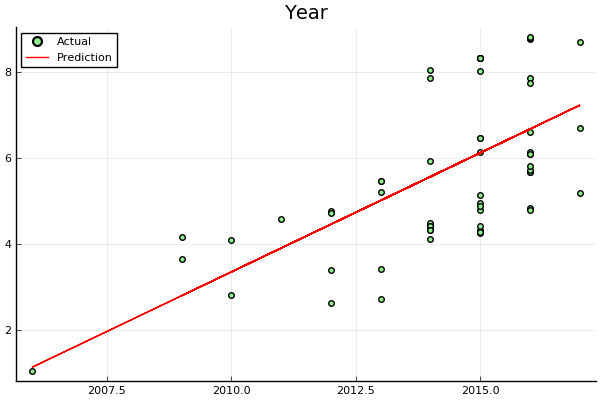

In [9]:
year = data_test[:, "Year"]
yp = [factor1 year]
coYear = yp\result
f1 = coYear[1]*factor1 + coYear[2]*year

p1=scatter(year,result, color=:lightgreen, label= "Actual")
p1=plot!(year,f1,linewidth=1, color=:red,label = "Prediction", title="Year")

plot(p1)


### Present Price

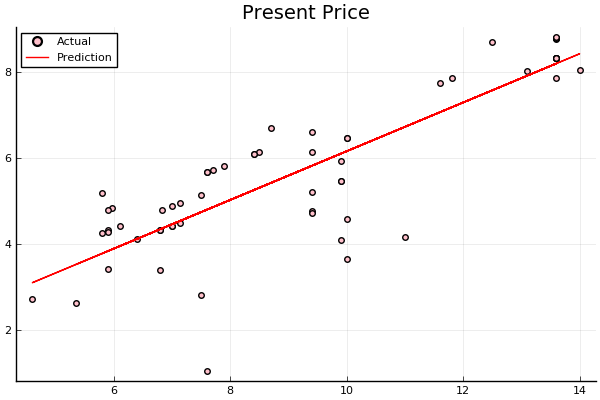

In [10]:
prp = data_test[:, "Present_Price"]
pp = [factor1 prp]
coP = pp\result
f2 = coP[1]*factor1 + coP[2]*prp

p2=scatter(prp,result, color=:pink, label= "Actual")
p2=plot!(prp,f2,linewidth=1, color=:red,label = "Prediction", title="Present Price")

plot(p2)


### Kms Driven

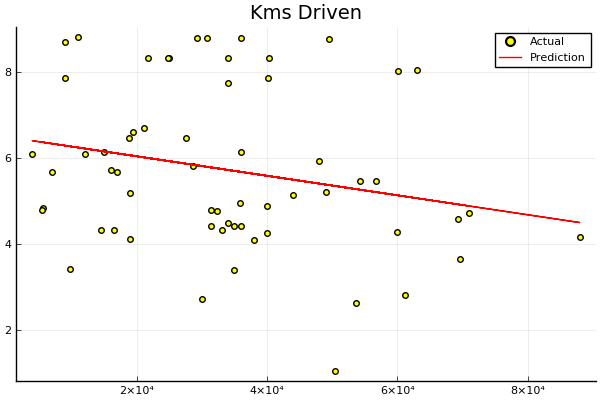

In [11]:
kms = data_test[:, "Kms_Driven"]
km = [factor1 kms]
coK = km\result
f3 = coK[1]*factor1 + coK[2]*kms

p3=scatter(kms,result, color=:yellow, label= "Actual")
p3=plot!(kms,f3,linewidth=1, color=:red,label = "Prediction", title="Kms Driven")

plot(p3)
